<a href="https://colab.research.google.com/github/iampro3/Bidata_WEB/blob/main/0602_GTSRB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRSRB
- 원본강의 사이트:
https://www.youtube.com/watch?v=gT48GRKbADI&list=PLS8gIc2q83OhM0RTktKDitgZGX5dHo7Vs&index=31
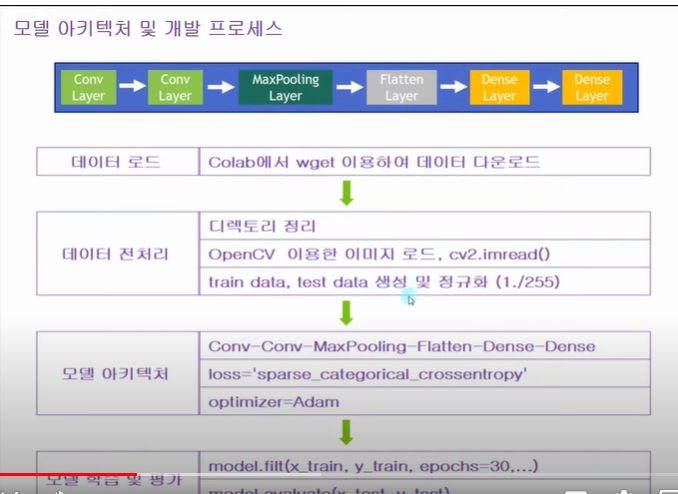


- github : https://github.com/neowizard2018/neowizard/tree/master/TensorFlow2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

In [ ]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip

--2023-06-02 13:19:52--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M  19.7MB/s    in 15s     

2023-06-02 13:20:08 (18.1 MB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]



In [ ]:
import os
ROOT_DIR = '/content'
DATA_ROOT_DIR = os.path.join(ROOT_DIR, '/GTSRB/Final_Traing/Images/')

In [ ]:
import os
import shutil

if os.path.exists('/content/GRSRB/'):

  shutil.rmtree('/content/GTSRB/')
  print('content/GTSRB/ is removed!!!')

In [ ]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile('/content/GTSRB_Final_Training_Images.zip', 'r') as target_file:

    target_file.extractall()

In [ ]:
# 데이터 전체 개수 확인

import os
import glob

# 데이터 정답 (label) 개수 및 종류 확인

label_name_list = os.listdir('/content/GTSRB/Final_Training/Images/')
#label_name_list = os.listdir(DATA_ROOT_DIR) : 오류남 : FileNotFoundError: [Errno 2] No such file or directory: '/GTSRB/Final_Traing/Images/'

print('total label nums = ', len(label_name_list))
print('=================================================')
print(label_name_list)

total label nums =  43
['00037', '00021', '00016', '00026', '00013', '00029', '00009', '00024', '00019', '00028', '00041', '00014', '00039', '00018', '00042', '00007', '00001', '00031', '00027', '00008', '00020', '00017', '00036', '00004', '00011', '00038', '00032', '00033', '00003', '00035', '00005', '00023', '00034', '00040', '00002', '00022', '00010', '00006', '00025', '00030', '00015', '00012', '00000']


- 원본 image를 정답 디렉토리 별로 읽어서 x_train numpy 생성 train label 읽어서 y_train numpy 생성

In [ ]:
import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_list = []
label_list = []

#image_label_list = os.listdir(DATA_ROOT_DIR)    # 정답이름
image_label_list = os.listdir('/content/GTSRB/Final_Training/Images/') # 내가 폴더이름 변경함

for label_name in image_label_list:

    # 이미지 파일 읽어오기

    #file_path = os.path.join(DATA_ROOT_DIR, label_name)  # 오류남
    file_path = os.path.join('/content/GTSRB/Final_Training/Images/', label_name)   # 내가 폴더이름 변경함
    img_file_list = glob.glob(file_path+'/*.ppm')

    # 각각의 정답 디렉토리에 있는 이미지 파일, 즉 .ppm 파일 읽어서 리스트에 저장

    for img_file in img_file_list:

        try:
            src_img = cv2.imread(img_file, cv2.IMREAD_COLOR)
            src_img = cv2.resize(src_img, dsize=(32,32))
            src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)

            image_list.append(src_img)
            label_list.append(float(label_name))  # 정답은 문자열을 실수로 변환

        except Exception as err:
            print(str(err), img_file)
            continue

In [ ]:
# numpy 변환

x_train = np.array(image_list).astype('float32')
y_train = np.array(label_list).astype('float32')

print('x_train.shape = ', x_train.shape, ', y_train.shape = ', y_train.shape)

x_train.shape =  (39209, 32, 32, 3) , y_train.shape =  (39209,)


# test data 생성 : train:test = 8:2
-단 데이터 다양성을 위해 먼저 train data를 random shuffle한 후에 test data생성함
이때 주의점은 label.data도 동일한 인덱스로 shuffle되어야 한다.

In [ ]:
import numpy as np

s = np.arange(len(x_train))  # [ 0 1 2...39206 39207 39208]

np.random.shuffle(s)         # index random shuffle

x_train = x_train[s]
y_train = y_train[s]

# x_train : x_test = 8 : 2

In [ ]:
SPLIT_RATIO = 0.2

SPLIT_NUMS = int(SPLIT_RATIO*len(x_train))

x_test=x_train[0:SPLIT_NUMS]
y_test=y_train[0:SPLIT_NUMS]

x_train=x_train[SPLIT_NUMS:]
y_train=y_train[SPLIT_NUMS:]


# x_train, x_test, y_train, y_test shape 확인

In [ ]:
print('x_train.shape = ', x_train.shape, ', y_train.shape =', y_train.shape)
print('x_test.shape = ', x_test.shape, ', y_test.shape =', y_test.shape)

x_train.shape =  (31368, 32, 32, 3) , y_train.shape = (31368,)
x_test.shape =  (7841, 32, 32, 3) , y_test.shape = (7841,)


In [ ]:
print(y_train[:3])
print(y_test[:3])

[ 9.  1. 42.]
[ 1. 17.  2.]


- 데이터 정규화

In [ ]:
x_train = x_train.astype(np.float32) /255.0
x_test = x_test.astype(np.float32) /255.0

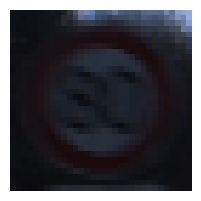

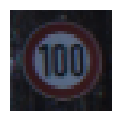

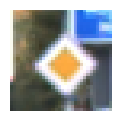

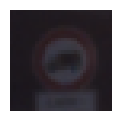

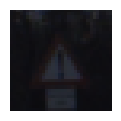

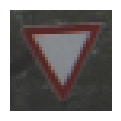

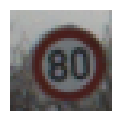

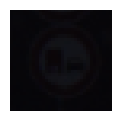

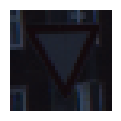

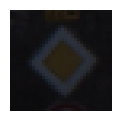

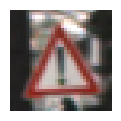

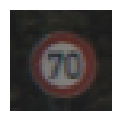

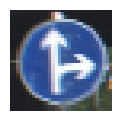

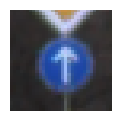

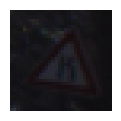

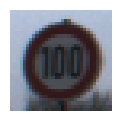

In [ ]:
import matplotlib.pyplot as plt

random_index = np.random.randint(0, len(x_train), 16)
plt.figure(figsize =(8,8))

for pos in range(len(random_index)):

  plt.subplot(4,4,pos+1)
  plt.axis('off')
  train_img_index=random_index[pos]
  plt.imshow(x_train[train_img_index])

  plt.tight_layout()
  plt.show()

-Sequential 모델 구축

In [ ]:
n_classes = len(os.listdir('/content/GTSRB/Final_Training/Images/'))

model = Sequential()

model.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3), filters=32, activation='relu'))
model.add(Conv2D( kernel_size=(3,3), filters=64, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0,5))
model.add(Dense(n_classes, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               3211520   
                                                      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']
               )

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime

earlystopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

start_time = datetime.now()

hist = model.fit(x_train, y_train, batch_size=32, epochs=30,
                 validation_data=(x_test, y_test), callbacks=[earlystopping])

end_time = datetime.now()

print('elapsed time => ', end_time-start_time)

Epoch 1/30
981/981 [==============================] - 6s 4ms/step - loss: 0.5591 - accuracy: 0.8534 - val_loss: 0.1406 - val_accuracy: 0.9626
Epoch 2/30
981/981 [==============================] - 4s 4ms/step - loss: 0.0822 - accuracy: 0.9792 - val_loss: 0.0832 - val_accuracy: 0.9774
Epoch 3/30
981/981 [==============================] - 4s 4ms/step - loss: 0.0431 - accuracy: 0.9885 - val_loss: 0.0579 - val_accuracy: 0.9861
Epoch 4/30
981/981 [==============================] - 4s 4ms/step - loss: 0.0295 - accuracy: 0.9918 - val_loss: 0.0593 - val_accuracy: 0.9858
Epoch 5/30
981/981 [==============================] - 4s 4ms/step - loss: 0.0252 - accuracy: 0.9925 - val_loss: 0.0734 - val_accuracy: 0.9833
Epoch 6/30
981/981 [==============================] - 4s 4ms/step - loss: 0.0147 - accuracy: 0.9964 - val_loss: 0.0489 - val_accuracy: 0.9889
Epoch 7/30
981/981 [==============================] - 4s 4ms/step - loss: 0.0118 - accuracy: 0.9965 - val_loss: 0.0841 - val_accuracy: 0.9824
Epoch 

In [ ]:
model.evaluate(x_test, y_test)

246/246 [==============================] - 1s 2ms/step - loss: 0.0542 - accuracy: 0.9883


[0.05417337641119957, 0.9882668256759644]

In [ ]:
y_pred = model.predict(x_test)
print(y_pred.shape)

246/246 [==============================] - 0s 2ms/step
(7841, 43)


TypeError: ignored

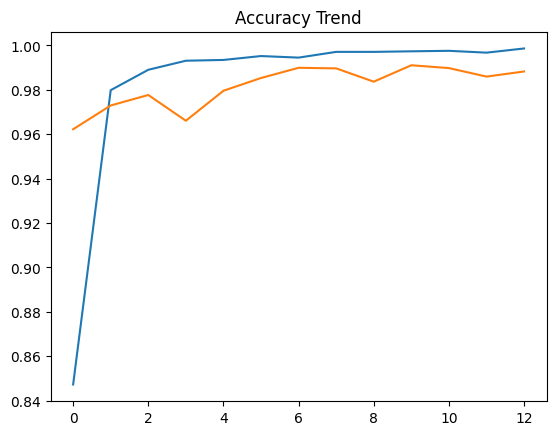

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

TypeError: ignored

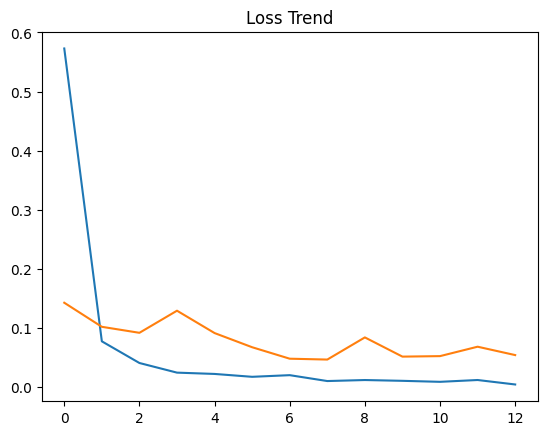

In [ ]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()